## Imports

In [66]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

## Load the Data

In [2]:
df_eng = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_user_engagement-intern.csv", encoding = "ISO-8859-1")
df_users = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_users-intern.csv", encoding = "ISO-8859-1")

## Analyze the Data and Perform EDA

In [3]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com


In [5]:
df_eng.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [6]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
df_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  email_domain                12000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.0+ MB


In [9]:
df_users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
email_domain                     0
dtype: int64

In [10]:
df_users.isnull().sum().sum()

8760

In [11]:
df_eng.isnull().sum().sum()

0

In [12]:
df_users.rename(columns = {"object_id":"user_id"}, inplace = True)
df_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com


In [13]:
df_users["creation_time"].describe()

count                   12000
unique                  11996
top       2012-09-01 07:22:09
freq                        2
Name: creation_time, dtype: object

In [14]:
df_eng["time_stamp"].describe()

count                  207917
unique                 207220
top       2014-02-22 21:21:37
freq                        2
Name: time_stamp, dtype: object

In [15]:
df_eng.time_stamp = pd.to_datetime(df_eng.time_stamp)
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


We define an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period - we can use a rolling function to append another column to df_eng

In [16]:
def get_adopted_user(df, t):
    return df.rolling(t, on = "time_stamp")["user_id"].count()

In [17]:
df_eng["7 Day Period (Logged In)"] = df_eng.groupby("user_id", as_index = False, 
                                                   group_keys = False).apply(get_adopted_user, "7D")


In [18]:
df_eng.head()

,time_stamp,user_id,visited,7 Day Period (Logged In)
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [19]:
df_eng_adopt = df_eng.groupby("user_id")[["7 Day Period (Logged In)"]].max()
df_eng_adopt["7 Day Period (Logged In)"] = df_eng_adopt["7 Day Period (Logged In)"].astype(int)

In [20]:
df_eng_adopt.head()

,7 Day Period (Logged In)
user_id,
1,1
2,3
3,1
4,1
5,1


In [21]:
df_eng_adopt.loc[df_eng_adopt["7 Day Period (Logged In)"] >= 3, "adopted_user"] = 1
df_eng_adopt.loc[df_eng_adopt["7 Day Period (Logged In)"] < 3, "adopted_user"] = 0
df_eng_adopt["adopted_user"] = df_eng_adopt["adopted_user"].astype(int)

In [22]:
df_eng_adopt.head()

,7 Day Period (Logged In),adopted_user
user_id,,
1,1,0
2,3,1
3,1,0
4,1,0
5,1,0


In [23]:
df_eng_adopt["adopted_user"].value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [24]:
t = df_eng.groupby("user_id", as_index = False).agg({"time_stamp" : np.min})
t.head()

,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20


## Combine the multiple dataframes in order to continue further preprocessing

In [25]:
df = df_users.merge(df_eng_adopt, how = "left", on = "user_id", sort = True)
df = df.merge(t, how = "left", on = "user_id", sort = True)
df = df.rename({"time_stamp": "init_login"}, axis = "columns")
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,7 Day Period (Logged In),adopted_user,init_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  email_domain                12000 non-null  object        
 11  7 Day Period (Logged In)    8823 non-null   float64   

In [27]:
df["creation_time"] = pd.to_datetime(df["creation_time"])

#### Let's get some info on how much time it takes the user from creating an account to logging in for the first time

In [28]:
df["first_login_timestamp"] = (df["init_login"] - df["creation_time"]).dt.days
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,7 Day Period (Logged In),adopted_user,init_login,first_login_timestamp
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0


In [30]:
diff_user_login = df_eng.groupby("user_id").time_stamp.apply(lambda x: x - x.shift()).dt.days
diff_user_login = pd.DataFrame(diff_user_login)
diff_user_login.columns = ["diff_user_login_avg"]
diff_user_login.head()
diff_user_login.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 1 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   diff_user_login_avg  199094 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB


In [31]:
diff_user_login.head()

,diff_user_login_avg
0,NaN
1,NaN
2,14.0
3,10.0
4,16.0


In [32]:
df_eng = df_eng.merge(diff_user_login, left_index = True, right_index = True)
df_eng.head()

,time_stamp,user_id,visited,7 Day Period (Logged In),diff_user_login_avg
0,2014-04-22 03:53:30,1,1,1.0,NaN
1,2013-11-15 03:45:04,2,1,1.0,NaN
2,2013-11-29 03:45:04,2,1,1.0,14.0
3,2013-12-09 03:45:04,2,1,1.0,10.0
4,2013-12-25 03:45:04,2,1,1.0,16.0


In [33]:
login_mean = df_eng.groupby("user_id").agg({"diff_user_login_avg" : np.mean})
login_mean.head()

,diff_user_login_avg
user_id,
1,NaN
2,10.461538
3,NaN
4,NaN
5,NaN


In [34]:
df = df.merge(login_mean, how = "left", on = "user_id")
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,7 Day Period (Logged In),adopted_user,init_login,first_login_timestamp,diff_user_login_avg
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0,NaN


In [35]:
df.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
315      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [36]:
def classify_ord(val):
    value = "small"
    if val > 300:
        value = "Large"
    elif val > 100:
        value = "medium"
    return value

In [37]:
df["org_size"] = df.org_id.apply(classify_ord)
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,7 Day Period (Logged In),adopted_user,init_login,first_login_timestamp,diff_user_login_avg,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


In [38]:
df["email_domain"].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
gitxg.com            1
lylko.com            1
gixob.com            1
feibf.com            1
oklxi.com            1
Name: email_domain, Length: 1184, dtype: int64

In [39]:
def classify_email(val):
    value = 'other'
    if val == 'gmail.com':
        value = 'gmail'
    elif val == 'yahoo.com':
        value = 'yahoo'
    elif val == 'jourrapide.com':
        value = 'jourrapide'
    elif val == 'cuvox.de':
        value =='cuvox'
    elif val == 'gustr.com':
        value = 'gustr'
    elif val == 'hotmail.com':
        value = 'hotmail'
    return value

In [40]:
df["email"] = df["email_domain"].apply(classify_email)

In [41]:
df["email"].value_counts()

gmail         3562
yahoo         2447
other         2388
jourrapide    1259
gustr         1179
hotmail       1165
Name: email, dtype: int64

In [42]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,7 Day Period (Logged In),adopted_user,init_login,first_login_timestamp,diff_user_login_avg,org_size
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


In [43]:
df.last_session_creation_time.head()

0    1.398139e+09
1    1.396238e+09
2    1.363735e+09
3    1.369210e+09
4    1.358850e+09
Name: last_session_creation_time, dtype: float64

In [44]:
df["last_session_creation_time"] = df["last_session_creation_time"]/(10000000)
df["last_session_creation_time"].head()

0    139.813881
1    139.623750
2    136.373489
3    136.921017
4    135.884966
Name: last_session_creation_time, dtype: float64

In [45]:
df.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
11770.0    11
1525.0     11
2308.0     11
           ..
5592.0      1
5289.0      1
3288.0      1
4467.0      1
10872.0     1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [46]:
def classify_group(val):
    value = "small"
    if val > 10:
        value = "Large"
    elif val > 5:
        value = "medium"
    elif val == 0:
        value = np.nan
    return value

In [47]:
df["group_size"] = df.invited_by_user_id.apply(classify_group)
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,7 Day Period (Logged In),adopted_user,init_login,first_login_timestamp,diff_user_login_avg,org_size,group_size
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,139.813881,1,0,11,10803.0,yahoo.com,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small,Large
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,139.623750,0,0,1,316.0,gustr.com,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small,Large
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,136.373489,0,0,94,1525.0,gustr.com,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small,Large
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,136.921017,0,0,1,5151.0,yahoo.com,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small,Large
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,135.884966,0,0,193,5240.0,yahoo.com,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium,Large


In [48]:
df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [49]:
df.adopted_user.value_counts()

0.0    7221
1.0    1602
Name: adopted_user, dtype: int64

In [50]:
df[["user_id","adopted_user"]]

,user_id,adopted_user
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
11995,11996,0.0
11996,11997,0.0
11997,11998,0.0
11998,11999,0.0


In [51]:
df = df.drop(['user_id','creation_time','name','org_id','invited_by_user_id','email_domain','7 Day Period (Logged In)','init_login'], axis = 1)

In [52]:
df.head()

,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_timestamp,diff_user_login_avg,org_size,group_size
0,yahoo,GUEST_INVITE,139.813881,1,0,0.0,0.0,NaN,small,Large
1,gustr,ORG_INVITE,139.623750,0,0,1.0,0.0,10.461538,small,Large
2,gustr,ORG_INVITE,136.373489,0,0,0.0,0.0,NaN,small,Large
3,yahoo,GUEST_INVITE,136.921017,0,0,0.0,1.0,NaN,small,Large
4,yahoo,GUEST_INVITE,135.884966,0,0,0.0,5.0,NaN,medium,Large


In [53]:
df = pd.get_dummies(df, columns = ["creation_source", "org_size", "group_size","email"])

In [54]:
df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_timestamp,diff_user_login_avg,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,org_size_small,group_size_Large,group_size_medium,group_size_small,email_gmail,email_gustr,email_hotmail,email_jourrapide,email_other,email_yahoo
0,139.813881,1,0,0.0,0.0,NaN,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,139.623750,0,0,1.0,0.0,10.461538,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
2,136.373489,0,0,0.0,0.0,NaN,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
3,136.921017,0,0,0.0,1.0,NaN,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,135.884966,0,0,0.0,5.0,NaN,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          8823 non-null   float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        8823 non-null   float64
 4   first_login_timestamp               8823 non-null   float64
 5   diff_user_login_avg                 2588 non-null   float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

## Populate the missing values

In [56]:
df.last_session_creation_time = df.last_session_creation_time.fillna(137.927931)
df.adopted_user = df.adopted_user.fillna(0)
df.first_login_timestamp = df.first_login_timestamp.fillna(1.001813)
df.diff_user_login_avg = df.diff_user_login_avg.fillna(7.822104)

### Feature Matrix and Target Variable

In [57]:
X = df.drop("adopted_user", axis=1)
y = df["adopted_user"]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          12000 non-null  float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        12000 non-null  float64
 4   first_login_timestamp               12000 non-null  float64
 5   diff_user_login_avg                 12000 non-null  float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

In [59]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

### Output 10 best features using SelectKBest

In [60]:
print(featureScores.nlargest(10,'Score'))

                                 Specs        Score
4                  diff_user_login_avg  2716.483567
7    creation_source_PERSONAL_PROJECTS    56.844560
0           last_session_creation_time    36.239314
12                      org_size_small    22.581597
5         creation_source_GUEST_INVITE    20.283149
21                         email_yahoo    15.237361
11                     org_size_medium    15.133797
9   creation_source_SIGNUP_GOOGLE_AUTH    13.848040
18                       email_hotmail    12.762762
16                         email_gmail    11.048830


### Correlation Matrix

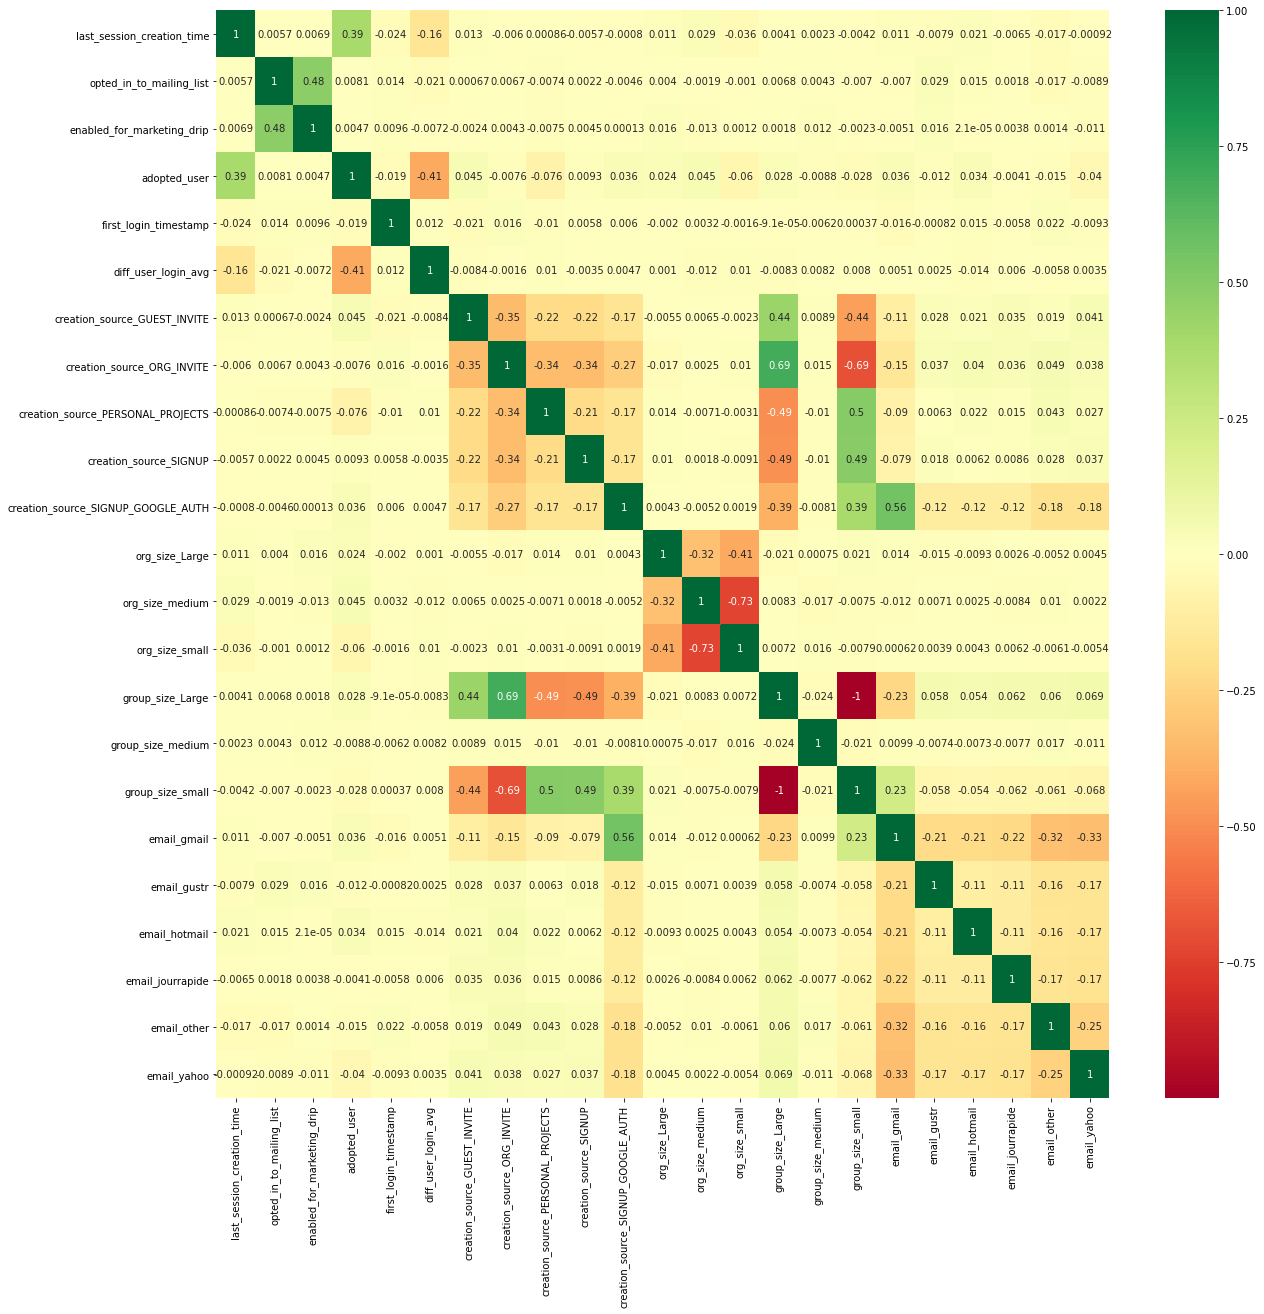

In [61]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Split the Dataset and train using a RandomForestClassifier

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train,y_train)
rand_forest_pred = rand_forest.predict(X_test)

In [68]:
rfc_cv_score = cross_val_score(rand_forest, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rand_forest_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rand_forest_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[2045   29]
 [  71  255]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2074
         1.0       0.90      0.78      0.84       326

    accuracy                           0.96      2400
   macro avg       0.93      0.88      0.91      2400
weighted avg       0.96      0.96      0.96      2400



=== All AUC Scores ===
[0.98907452 0.99229567 0.98699219 0.99077524 0.99053786 0.98571214
 0.99199219 0.99202825 0.9842957  0.98985228]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9893556033204918


In [69]:
feature_importance = pd.Series(rand_forest.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

In [70]:
print(feature_importance)

diff_user_login_avg                   0.540887
last_session_creation_time            0.351690
first_login_timestamp                 0.030292
opted_in_to_mailing_list              0.008182
enabled_for_marketing_drip            0.006819
org_size_small                        0.005713
email_yahoo                           0.004770
email_gmail                           0.004747
org_size_medium                       0.004720
email_other                           0.004712
org_size_Large                        0.004371
email_jourrapide                      0.004208
email_hotmail                         0.004207
email_gustr                           0.003984
creation_source_ORG_INVITE            0.003949
creation_source_PERSONAL_PROJECTS     0.003666
creation_source_GUEST_INVITE          0.003656
creation_source_SIGNUP                0.002853
group_size_Large                      0.002559
group_size_small                      0.002044
creation_source_SIGNUP_GOOGLE_AUTH    0.001969
group_size_me

### For easier visualization, let's convert the feature importance variable into a dataframe

In [71]:
df_feat_impo = pd.DataFrame(feature_importance)

In [73]:
df_feat_impo.columns = ["user_id"]
df_new = df_feat_impo.reset_index()

In [74]:
df_new.columns = ["Feature Variable", "Correlation Score"]
df_new

,Feature Variable,Correlation Score
0,diff_user_login_avg,0.540887
1,last_session_creation_time,0.351690
2,first_login_timestamp,0.030292
3,opted_in_to_mailing_list,0.008182
4,enabled_for_marketing_drip,0.006819
5,org_size_small,0.005713
6,email_yahoo,0.004770
7,email_gmail,0.004747
8,org_size_medium,0.004720
9,email_other,0.004712


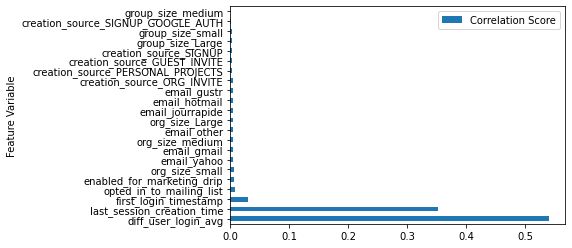

In [76]:
df_new.plot(kind='barh', x = "Feature Variable", y = "Correlation Score")
plt.show()